# Outlier and Correlation Matrix Analisys

### Imports

In [33]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Helping functions

* Function to draw and analyze outliers of a given dataset

In [34]:
def draw_outliers(df):
    # Set up the figure size and style
    plt.figure(figsize=(12, 6))
    sb.set(style="whitegrid")

    # Get the numerical columns
    num_cols = df.select_dtypes(include='number').columns

    # Create subplots for each numerical column
    fig, axes = plt.subplots(1, len(num_cols), figsize=(4 * len(num_cols), 4))
    fig.subplots_adjust(wspace=0.5)  # Space between subplots

    # Create boxplots for each numerical column
    for i, column in enumerate(num_cols):
        sb.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')

        # Identify and highlight outliers using red color
        outliers = df[(df[column] - df[column].median()).abs() > 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))]
        axes[i].scatter(x=outliers.index, y=outliers[column], c='red', label='Outliers')

    plt.show()


def draw_outliers_def_columns(df, cols_per_row=4):
    # Set up the figure size and style
    plt.figure(figsize=(12, 6))
    sb.set(style="whitegrid")

    # Get the numerical columns
    num_cols = df.select_dtypes(include='number').columns
    num_cols_count = len(num_cols)

    # Calculate the number of rows needed
    num_rows = (num_cols_count - 1) // cols_per_row + 1

    # Create subplots with dynamically calculated layout
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(4 * cols_per_row, 4 * num_rows))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Space between subplots

    # Create boxplots for each numerical column
    for i, column in enumerate(num_cols):
        row = i // cols_per_row
        col = i % cols_per_row

        sb.boxplot(x=df[column], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot for {column}')

        # Identify and highlight outliers using red color
        outliers = df[(df[column] - df[column].median()).abs() > 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))]
        axes[row, col].scatter(x=outliers.index, y=outliers[column], c='red', label='Outliers')

    # Hide empty subplots
    for i in range(num_cols_count, num_rows * cols_per_row):
        axes[i // cols_per_row, i % cols_per_row].axis('off')

    plt.show()


* Function to draw and analyze the correlation matrix of a given dataset

In [35]:
def correlation_matrix(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Set up the figure size
    plt.figure(figsize=(10, 8))

    # Create a heatmap for the correlation matrix
    sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2,
               annot_kws={"size": 4})  # Adjust the size as needed

    # Set the title and labels
    plt.title("Correlation Matrix")
    plt.xlabel("Features")
    plt.ylabel("Features")

    # Show the plot
    plt.show()

## 1. Teams dataset

#### Outlier Analysis
To begin our analysis, we'll start by reading the teams dataset and remove the irrelevant columns. This initial step is essential to ensure that we focus our efforts on analyzing outliers in the columns that are most relevant to our analysis. 
Then proceed to the analysis of the outliers for the data on each column, and take some conclusions.


<Figure size 1200x600 with 0 Axes>

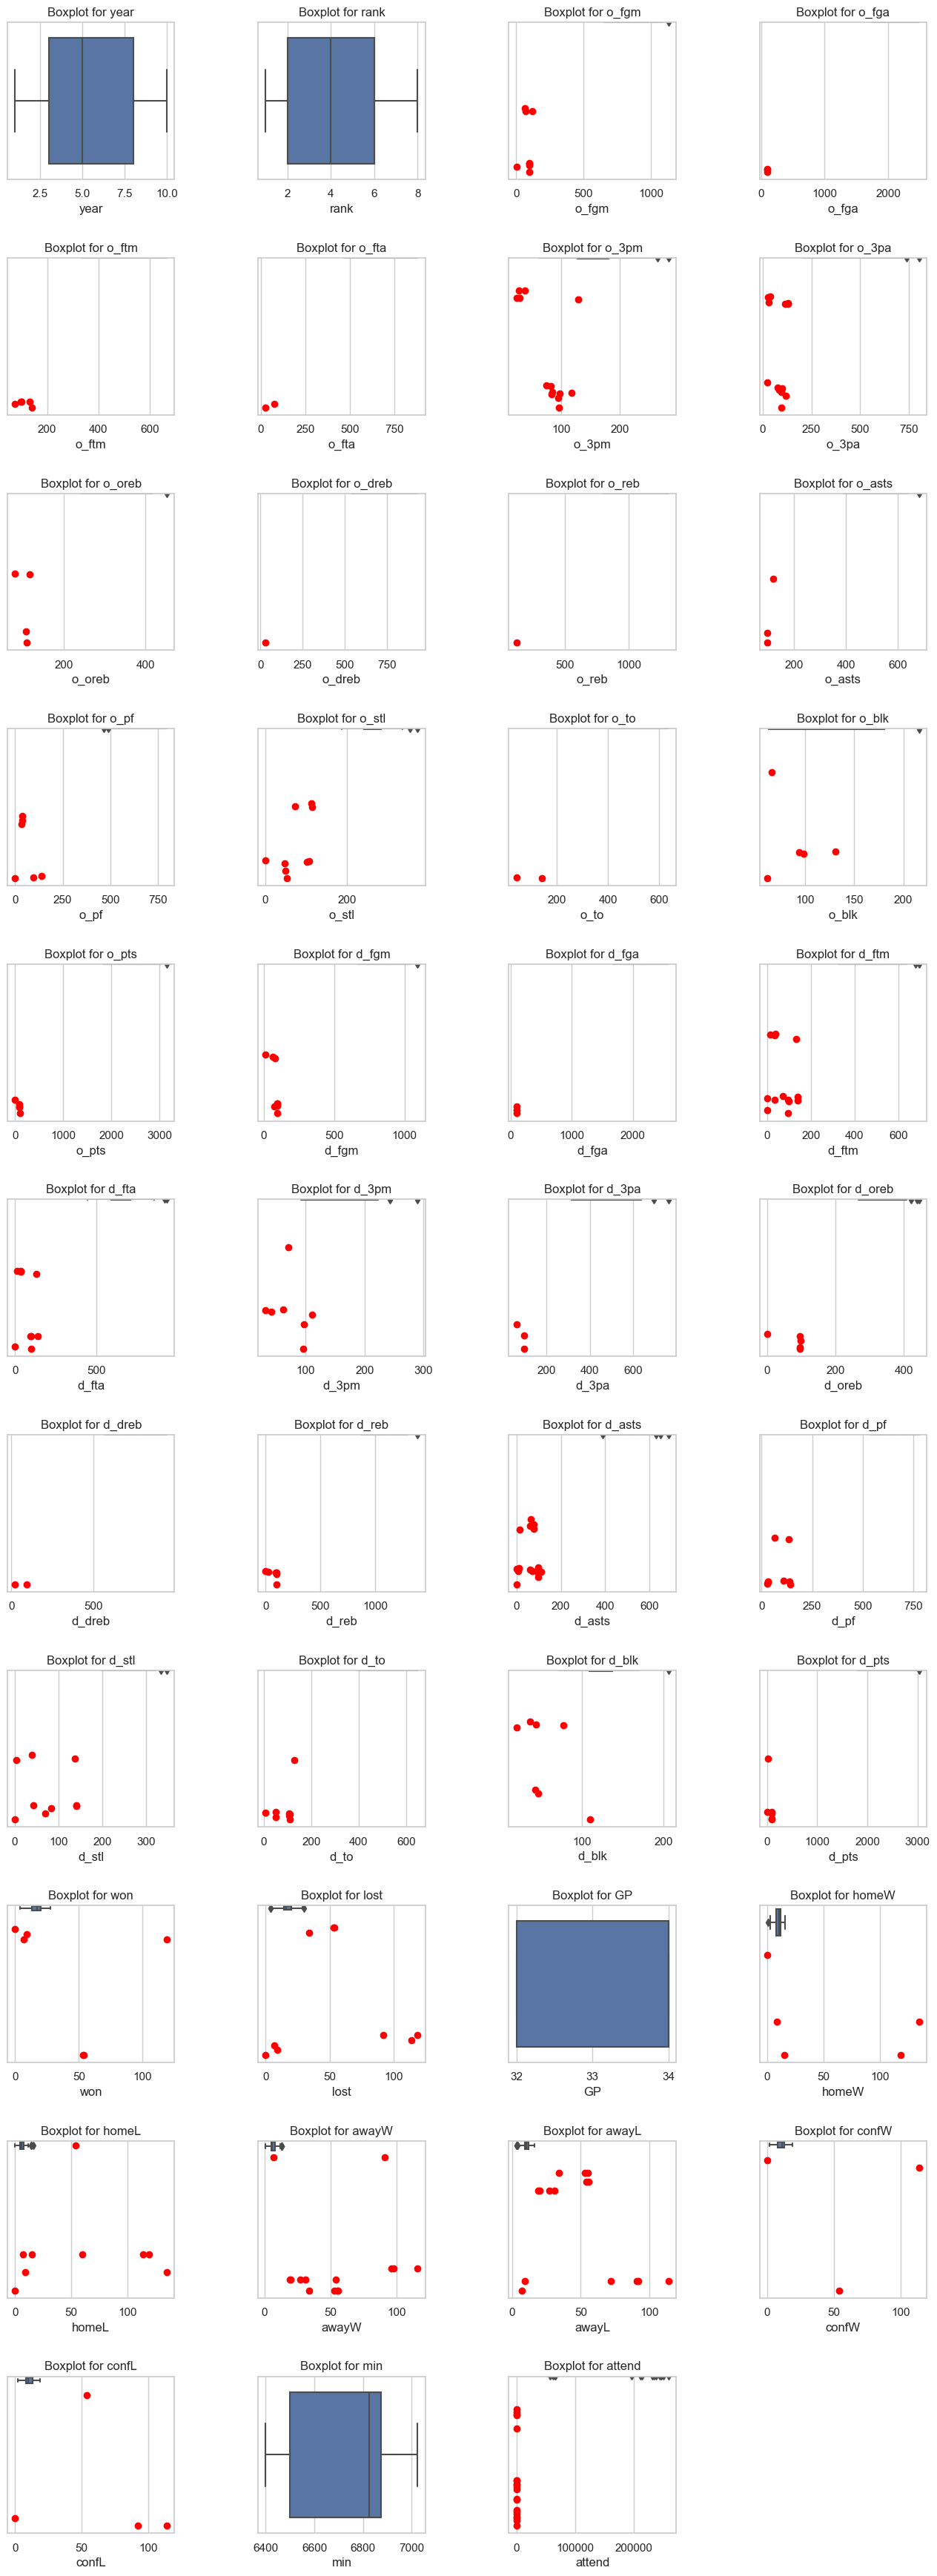

In [36]:
# Read the teams CSV
df_original_teams = pd.read_csv('data/teams.csv')

# Dropping irrelevant columns since they won't be used
columns_to_remove = ['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB']
df_teams = df_original_teams.drop(columns=columns_to_remove)

draw_outliers_def_columns(df_teams, 4)



#### Correlation Matrix Analysis
Now, we will proceed to the analisys of the correlation matrix on the Teams dataset, so that we can perceive which columns might be irrelevant 

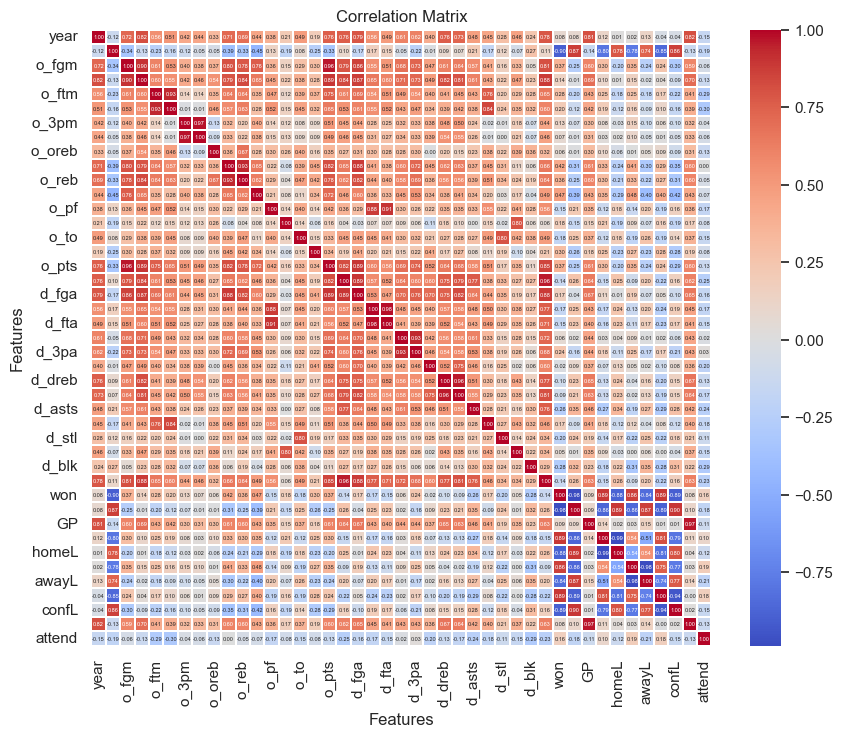

In [37]:
# Select only the numerical columns
numerical_columns = df_teams.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)

## 2. Players dataset

<Figure size 1200x600 with 0 Axes>

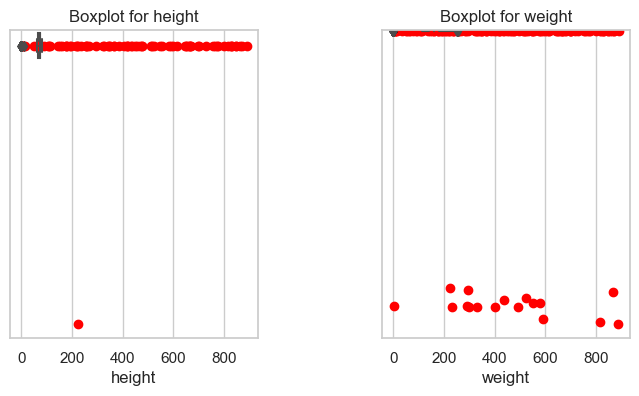

In [38]:
# Read the players CSV
df_original_players = pd.read_csv('data/players.csv')

# Dropping irrelevant columns since they won't be used
columns_to_remove = ['firstseason', 'lastseason']
df_players = df_original_players.drop(columns=columns_to_remove)

draw_outliers(df_players)

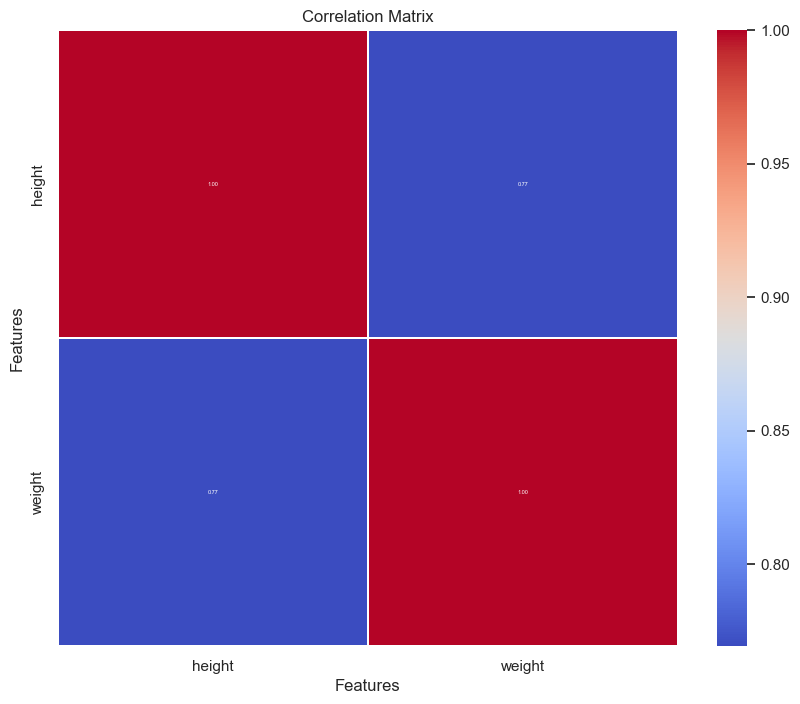

In [39]:
# Select only the numerical columns
numerical_columns = df_players.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)

## 3. Coaches dataset

<Figure size 1200x600 with 0 Axes>

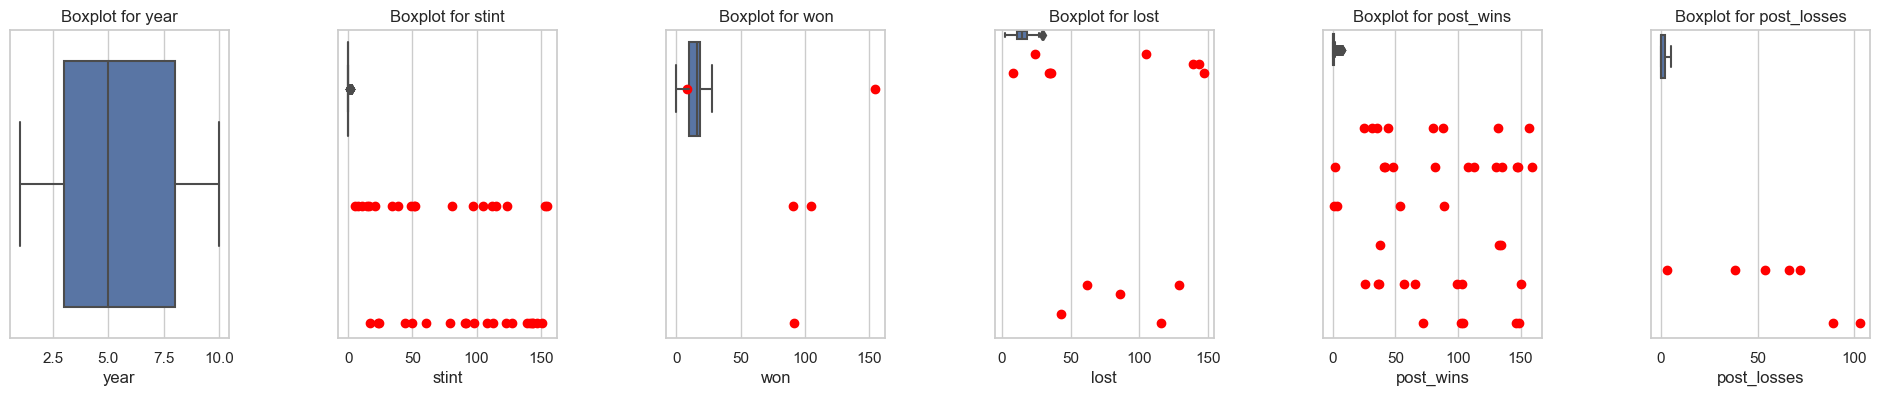

In [40]:
# Read the coaches CSV
df_original_coaches = pd.read_csv('data/coaches.csv')

# Dropping irrelevant columns since they won't be used
columns_to_remove = ['lgID']
df_coaches = df_original_coaches.drop(columns=columns_to_remove)

draw_outliers(df_coaches)

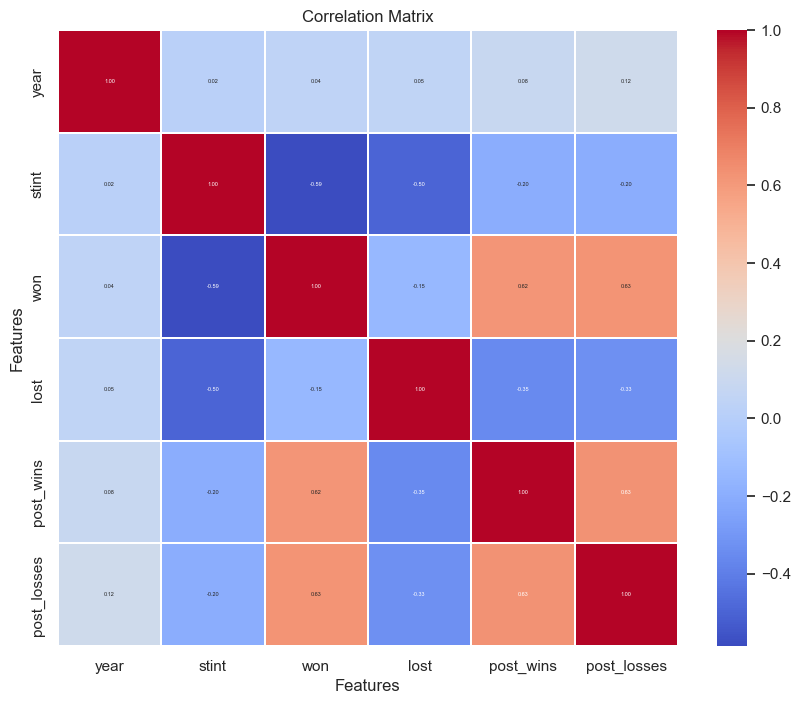

In [42]:
# Select only the numerical columns
numerical_columns = df_coaches.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)

## 4. Awarded Players dataset

<Figure size 1200x600 with 0 Axes>

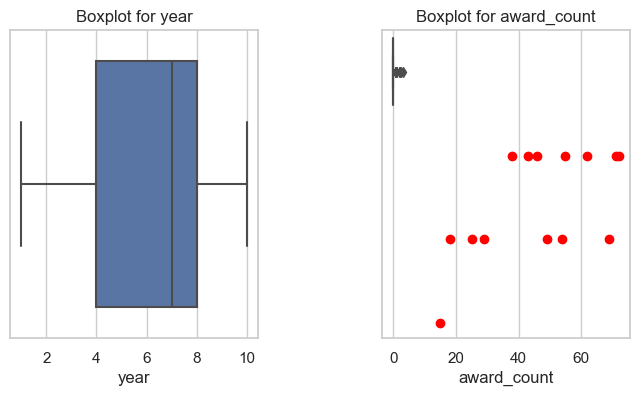

In [51]:
# Read the awards players CSV
df_awards_players = pd.read_csv('data/awards_players_processed.csv')

draw_outliers(df_awards_players )

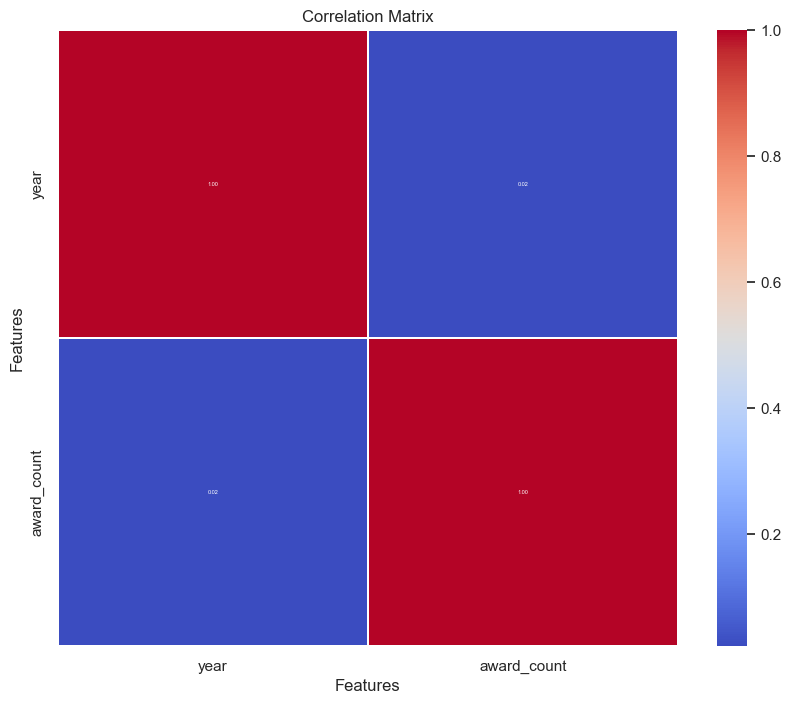

In [52]:
# Select only the numerical columns
numerical_columns = df_awards_players.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)

## 5. Teams Post dataset

<Figure size 1200x600 with 0 Axes>

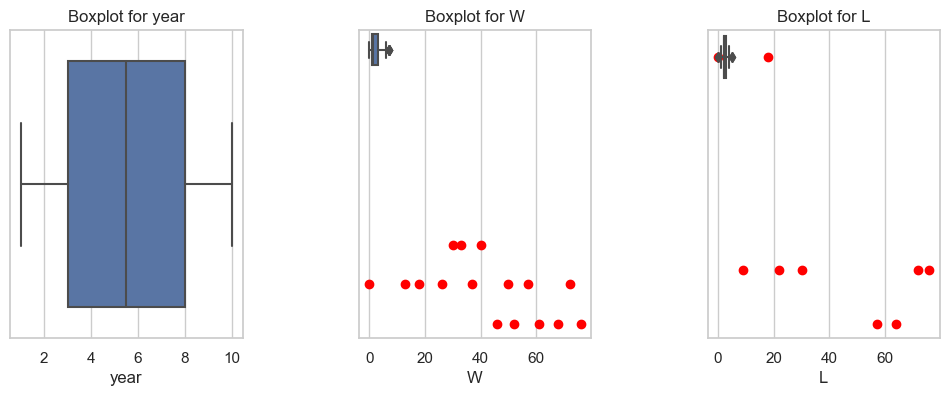

In [55]:
# Read the teams post CSV
df_original_teams_post = pd.read_csv('data/teams_post.csv')

# Dropping irrelevant columns since they won't be used
columns_to_remove = ['lgID']
df_teams_post = df_original_teams_post.drop(columns=columns_to_remove)

draw_outliers(df_teams_post)

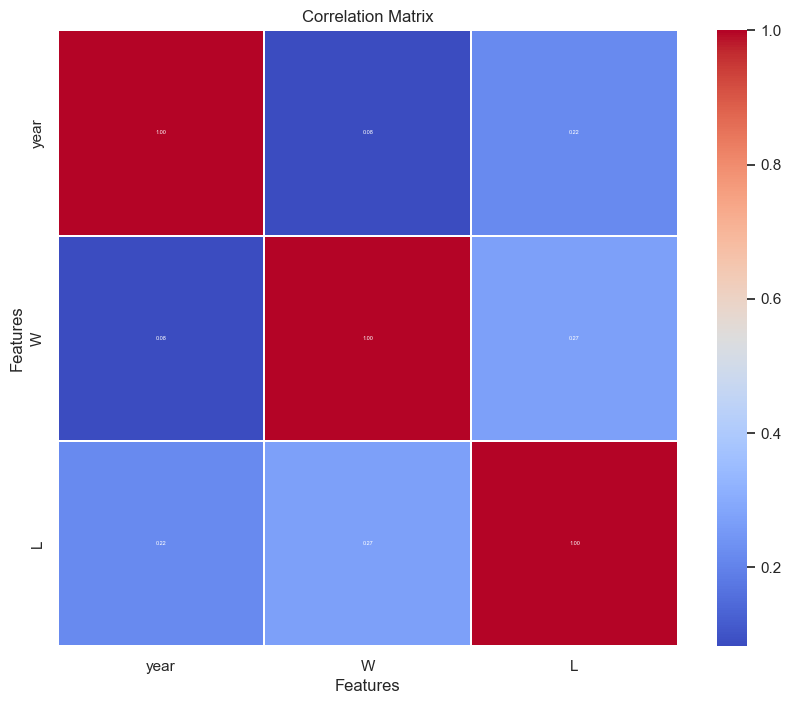

In [56]:
# Select only the numerical columns
numerical_columns = df_teams_post.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)

## 6. Series Post dataset

<Figure size 1200x600 with 0 Axes>

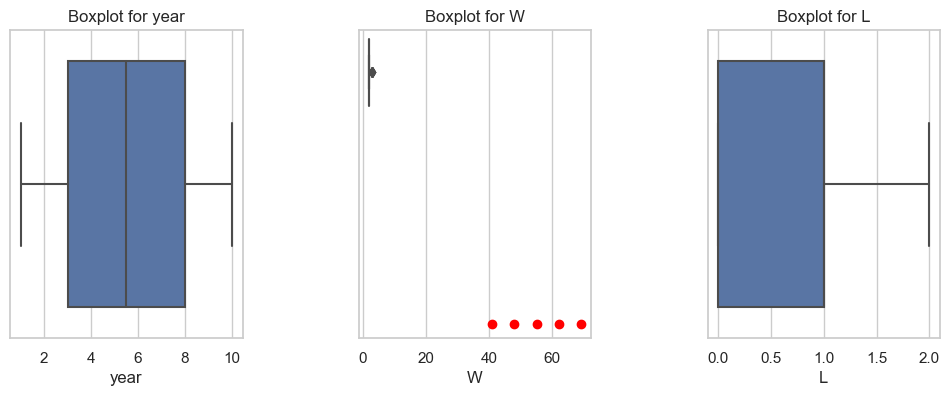

In [57]:
# Read the series post CSV
df_original_series_post = pd.read_csv('data/series_post.csv')

# Dropping irrelevant columns since they won't be used
columns_to_remove = ['lgIDWinner', 'lgIDLoser']
df_series_post = df_original_series_post.drop(columns=columns_to_remove)

draw_outliers(df_series_post)

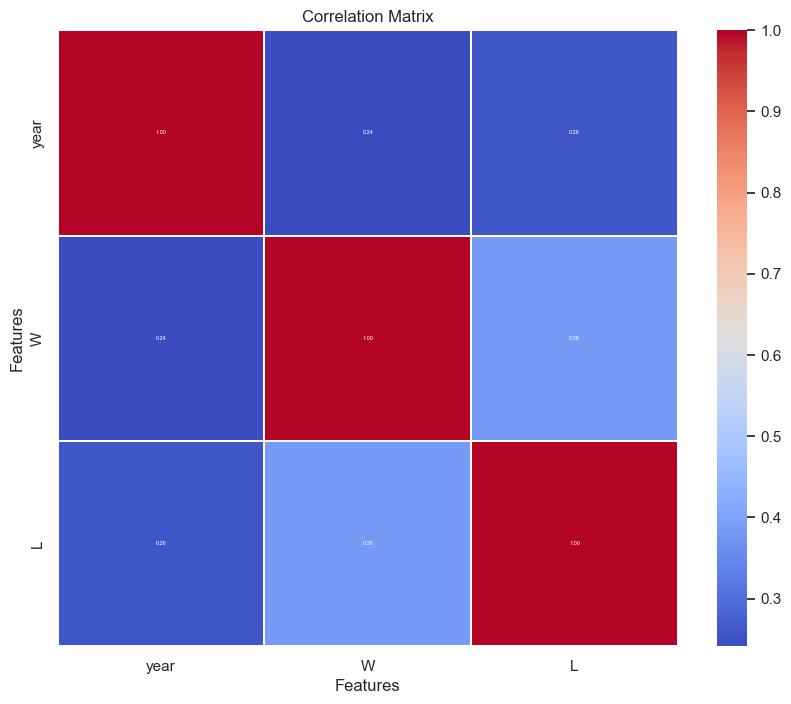

In [58]:
# Select only the numerical columns
numerical_columns = df_series_post.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)

## 7. Players-teams dataset 

<Figure size 1200x600 with 0 Axes>

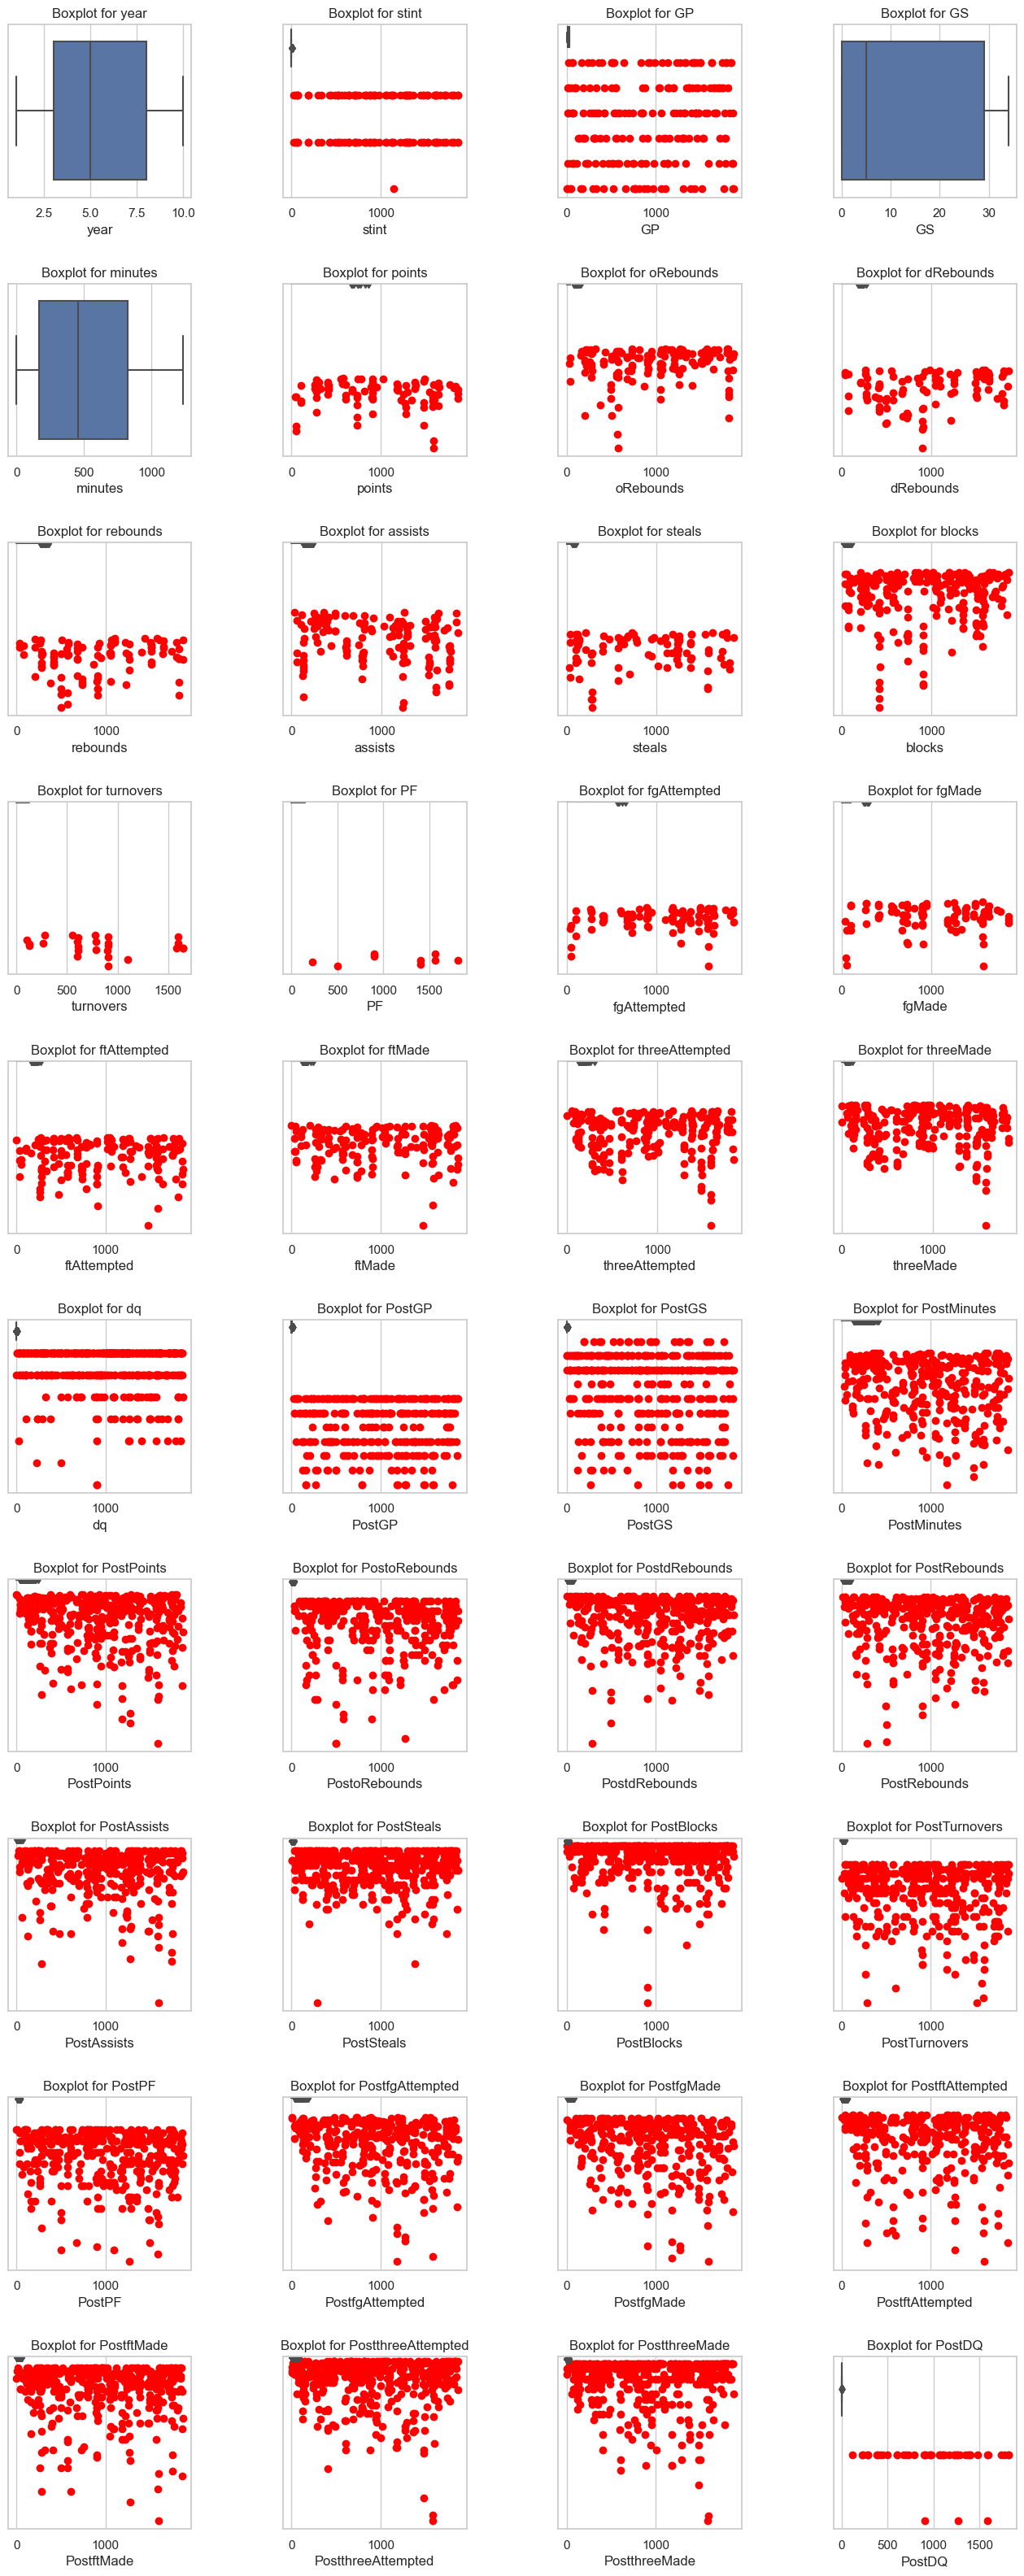

In [61]:
# Read the series post CSV
df_original_players_teams = pd.read_csv('data/players_teams.csv')

# Dropping irrelevant columns since they won't be used
columns_to_remove = ['lgID']
df_players_teams = df_original_players_teams.drop(columns=columns_to_remove)

draw_outliers_def_columns(df_players_teams,4)

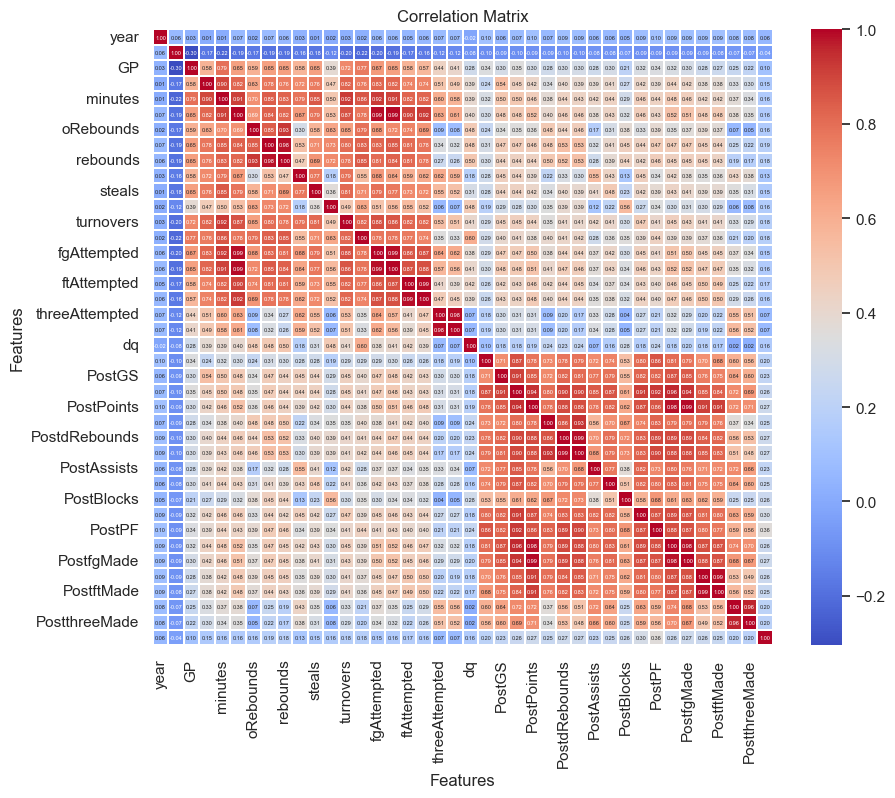

In [62]:
# Select only the numerical columns
numerical_columns = df_players_teams.select_dtypes(include='number')

# Draw correlation matrix
correlation_matrix(numerical_columns)